In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
import graphviz
import pydotplus

## Use the German credit rating dataset “German Credit Data.csv” , Decision treeclassifier  to  predict  good  or  bad  credit.  Use  “sklearn.model_selection”    and  GridSearchCVto  search  the  hyperparameter  values  and  report  the  most  optimal one.
## Configure the grid search to search for optimal parameters:
##      • Splitting criteria: gini or entropy.
##      • Maximum depth of decision tree ranging from 2 to 10.
##      • The searching of optimal parameter will be validated using 10-fold cross validation and the most optimalparameter will be chosen based on ROC AUC score.

In [23]:
german_credit_data = pd.read_csv("German Credit Data.csv")
german_credit_data

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [24]:
german_credit_data.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [25]:
german_credit_data = pd.get_dummies(german_credit_data)

In [26]:
X = np.array(german_credit_data.drop('status', axis =  1))
Y = np.array(german_credit_data['status'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [27]:
params = {'criterion': ['gini','entropy'], 'max_depth' : list(range(2,11))}
clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, cv=10, scoring='roc_auc', verbose = 1)
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc', verbose=1)

In [28]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 4}
0.7085206997084548


In [29]:
Y_pred = clf.predict(X_test)

In [30]:
acc = accuracy_score(Y_pred, Y_test)
print("Accuracy = ",acc)

Accuracy =  0.7166666666666667


In [31]:
params = {'criterion': ['entropy'], 'max_depth' : [4]}
clf = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 4)

In [32]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [33]:
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print("Accuracy after training with optimal hyper-parameters = ", acc)

Accuracy after training with optimal hyper-parameters =  0.7166666666666667


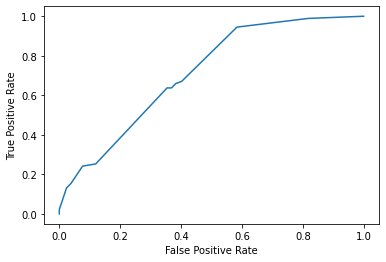

In [34]:
Y_pred_proba = clf.predict_proba(X_test)[::,-1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
print("ROC AUC Score = ",roc_auc_score(Y_test, Y_pred_proba))

ROC AUC Score =  0.7120248172879752


## Visualize the treeusing graphviz software.

[Text(610.3125, 978.48, 'X[9] <= 0.5\nentropy = 0.88\nsamples = 700\nvalue = [491, 209]'),
 Text(290.625, 761.0400000000001, 'X[0] <= 33.0\nentropy = 0.976\nsamples = 425\nvalue = [251, 174]'),
 Text(174.375, 543.6, 'X[1] <= 10975.5\nentropy = 0.939\nsamples = 343\nvalue = [221, 122]'),
 Text(116.25, 326.1600000000001, 'X[4] <= 35.5\nentropy = 0.929\nsamples = 337\nvalue = [221, 116]'),
 Text(58.125, 108.72000000000003, 'entropy = 0.975\nsamples = 211\nvalue = [125, 86]'),
 Text(174.375, 108.72000000000003, 'entropy = 0.792\nsamples = 126\nvalue = [96, 30]'),
 Text(232.5, 326.1600000000001, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(406.875, 543.6, 'X[20] <= 0.5\nentropy = 0.947\nsamples = 82\nvalue = [30, 52]'),
 Text(348.75, 326.1600000000001, 'X[3] <= 3.5\nentropy = 0.889\nsamples = 75\nvalue = [23, 52]'),
 Text(290.625, 108.72000000000003, 'entropy = 0.982\nsamples = 45\nvalue = [19, 26]'),
 Text(406.875, 108.72000000000003, 'entropy = 0.567\nsamples = 30\nvalue = [4, 26]

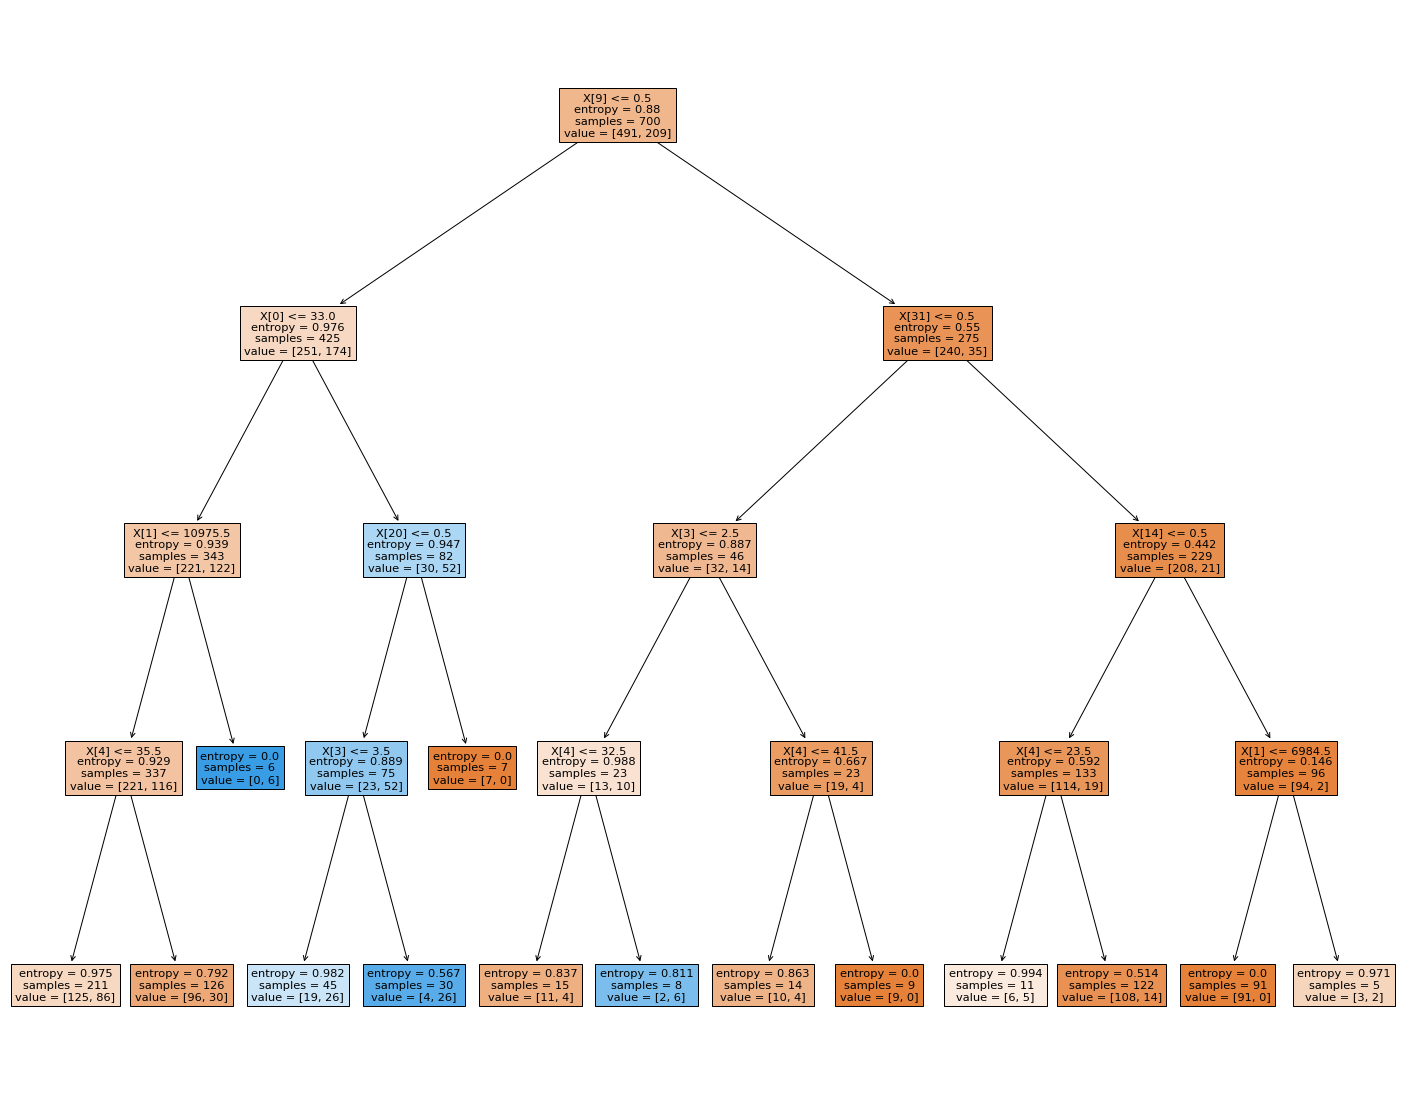

In [36]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

In [37]:
fig.savefig("DecisionTree.png")

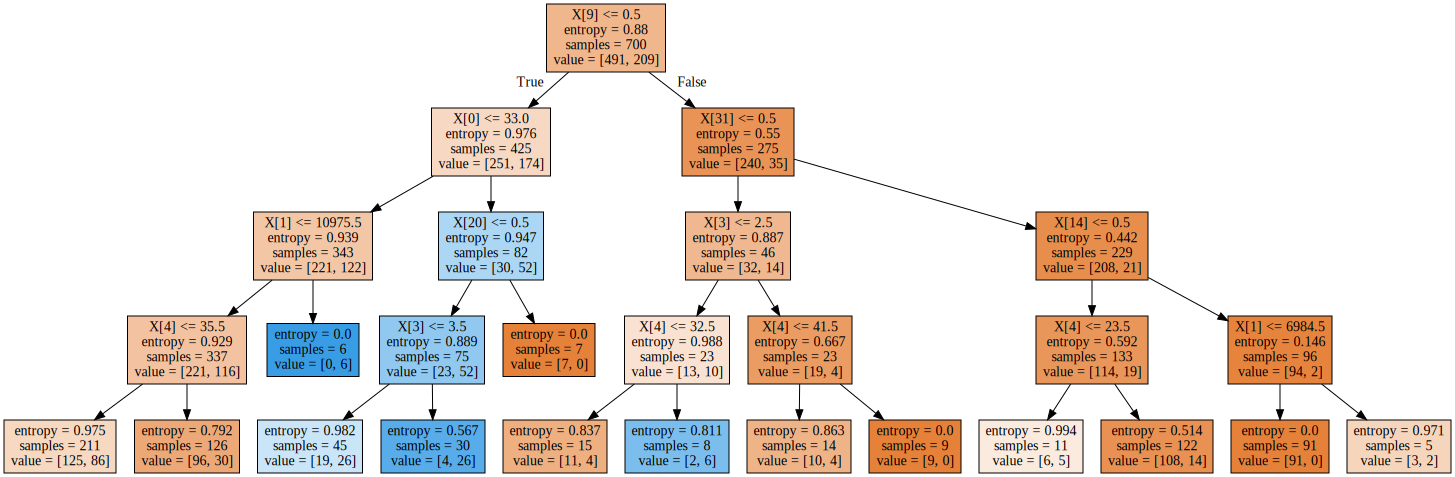

In [38]:
tree.export_graphviz(clf, out_file='tree.dot', filled=True)
graphviz.Source.from_file('tree.dot')

## Display the text representation of the rules learnt.

In [39]:
text = tree.export_text(clf)
print(text)

|--- feature_9 <= 0.50
|   |--- feature_0 <= 33.00
|   |   |--- feature_1 <= 10975.50
|   |   |   |--- feature_4 <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  35.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  10975.50
|   |   |   |--- class: 1
|   |--- feature_0 >  33.00
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_20 >  0.50
|   |   |   |--- class: 0
|--- feature_9 >  0.50
|   |--- feature_31 <= 0.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_4 <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  32.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  2.50
|   |   |   |--- feature_4 <= 41.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  41.50
|   |   |   |   |--- class: 0
|   |--- feature_31 >  0.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_4 <= 23.50
